In [2]:
import math
import matplotlib.pyplot as plt

%matplotlib inline

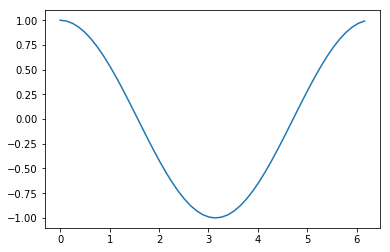

In [4]:
n = 50

# On initialize les listes
x_k = []
y_k = []

# Pour chaque itération:
for k in range(n):
    # 1. Calcul de x et y
    x = 2 * math.pi * k / n
    y = math.cos(x)
    # 2. Incrémentation les listes
    x_k.append(x)
    y_k.append(y)

# On plot le résultat
plt.plot(x_k, y_k)

Nous voulons écrire une fonction qui prend en argument un nom de fichier et une liste de listes de valeurs à enregistrer en colone.

In [36]:
# On définit la fonction avec la docstring (prendre l'habitude de le faire tout le temps)
def ecriture_fichier(nom_fichier, *args):
    """Ecrit les valeurs de listes dans un fichier.
    
    Parameters
    ----------
    nom_fichier : str
        Un nom de fichier ou un emplacement.
    *args : list
        Une ou plusieurs listes de même taille.
    """
    # Ouverture du fichier
    num_fichier = open(nom_fichier, 'w')
    
    # "args" est (en quelque sorte) un tuple des elements mis en arguments. 
    # La fonction "zip" permet de parcourir simultanément chaque "itérable" donné en argument.
    # Mettre le "*" devant args indique (en quelque sorte) que nous ajoutons en argument tous les
    # éléments du tuple args. Ce qui n'est pas la même que de donner directement le tuple args
    # en argument.
    for line_values in zip(*args):
        # La méthode "join" permet de lier chaque élément d'une liste dans un string.
        # La fonction "map" évalue une chaque élément d'une liste par une fonction.
        # Ici chaque élément de line_values est évalué par str pour les convertir en string.  
        line = " ".join(map(str, line_values))
        # On écrit le résultat, sans oublie de mettre un "\n" pour indiquer le saut de ligne.
        num_fichier.write('%s\n' % (line))
    num_fichier.close()
    
# Même chose, mais avec un "context manager": with (cela remplace l'ouverture et la fermeture du fichier).
def ecriture_fichier(nom_fichier, *args):
    """Ecrit les valeurs de listes dans un fichier.
    
    Parameters
    ----------
    nom_fichier : str
        Un nom de fichier ou un emplacement.
    *args : list
        Une ou plusieurs listes de même taille.
    """
    with open(nom_fichier, 'w') as file:
        for line_values in zip(*args):
            line = " ".join(map(str, line_values))
            file.write('%s\n' % (line))
    
nom_fichier = 'exo1.csv'
ecriture_fichier(nom_fichier, x_k, y_k)

In [53]:
def lecture_fichier(nom_fichier):
    """Lecture d'un fichier de valeurs par colonne.
    
    Parameters
    ----------
    nom_fichier : str
        Le fichier à lire.
        
    Return
    ------
    result : tuple
        Un tuple des résultat en colunne.
    """
    with open(nom_fichier) as file:
        # Nous parcourons chaque ligne du fichier
        values = []
        for line in file:
            # La fonction sépare le string en une liste et la fonction map les transforme en flotant.
            line_values = map(float, line.split())
            values.append(line_values)
        result = zip(*values)
    return result
    
x_k, y_k = lecture_fichier(nom_fichier)

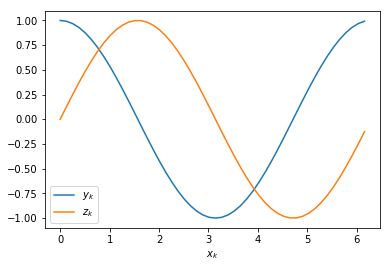

In [58]:
z_k = []
for x in x_k:
    z_k.append(math.sin(x))
    
# Peut être fait en une ligne aussi
z_k = [math.sin(x) for x in x_k]

plt.plot(x_k, y_k, label='$y_k$')
plt.plot(x_k, z_k, label='$z_k$')
plt.xlabel('$x_k$')
plt.legend(loc=0)

In [59]:
ecriture_fichier('fichier.txt', x_k, y_k, z_k)

In [5]:
!rm fichier.txt exo1.csv